In [11]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


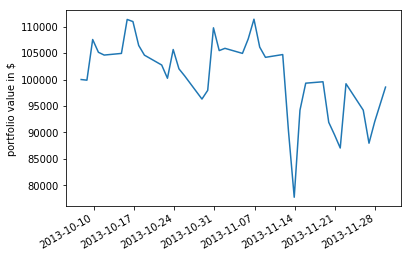

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,universe_size
2013-10-07 20:00:00+00:00,NaN,0.000000,NaN,-0.004789,NaN,NaN,0.000000,100000.000000,0.000,0.000,...,0.000,0,NaN,100000.000000,0.000,0.000,1,[],0.0,3042
2013-10-08 20:00:00+00:00,0.013418,-0.001195,NaN,-0.009555,0.000000,NaN,-43014.103207,56985.896793,42894.570,42894.570,...,-40442.180,2,-11.224972,100000.000000,0.000,0.000,2,"[{u'commission': None, u'amount': 12165, u'sid...",0.0,3042
2013-10-09 20:00:00+00:00,0.710598,0.075641,NaN,-0.014298,0.000000,NaN,19760.348052,76746.244846,30817.830,30817.830,...,-82987.890,3,580.676874,56985.896793,42894.570,42894.570,3,"[{u'commission': None, u'amount': -5660, u'sid...",0.0,3042
2013-10-10 20:00:00+00:00,0.692815,0.051483,NaN,-0.019018,0.000000,NaN,46672.554101,123418.798947,-18270.460,-18270.460,...,-135107.470,4,18.801398,76746.244846,30817.830,30817.830,4,"[{u'commission': None, u'amount': -2852, u'sid...",0.0,3045
2013-10-11 20:00:00+00:00,0.613907,0.046240,NaN,-0.023716,0.000000,NaN,15545.025841,138963.824788,-34339.790,-34339.790,...,-141559.110,5,14.881145,123418.798947,-18270.460,-18270.460,5,"[{u'commission': None, u'amount': -3653, u'sid...",0.0,3048
2013-10-14 20:00:00+00:00,0.550802,0.049350,0.749111,-0.023716,0.031035,-1.395929,14227.941767,153191.766555,-48256.720,-48256.720,...,-157917.380,6,14.420849,138963.824788,-34339.790,-34339.790,6,"[{u'commission': None, u'amount': -1510, u'sid...",0.0,3048
2013-10-15 20:00:00+00:00,0.593720,0.113534,0.749111,-0.028391,0.028733,-3.188535,-25144.287865,128047.478690,-16694.110,-16694.110,...,-137560.040,6,29.281849,153191.766555,-48256.720,-48256.720,7,"[{u'commission': None, u'amount': -1507, u'sid...",0.0,3048
2013-10-16 20:00:00+00:00,0.560628,0.109541,0.749111,-0.033044,0.026877,-2.537381,96058.541456,224106.020146,-113151.950,-113151.950,...,-202407.220,8,26.201487,128047.478690,-16694.110,-16694.110,8,"[{u'commission': None, u'amount': -745, u'sid'...",0.0,3048
2013-10-17 20:00:00+00:00,0.597862,0.064437,0.749111,-0.037675,0.025340,-1.081542,-51687.989068,172418.031078,-65974.310,-65974.310,...,-206754.930,7,7.699711,224106.020146,-113151.950,-113151.950,9,"[{u'commission': None, u'amount': -917, u'sid'...",0.0,3049
2013-10-18 20:00:00+00:00,0.577302,0.046057,0.749111,-0.042283,0.024040,-0.491747,-15239.066626,157178.964452,-52573.310,-52573.310,...,-190158.830,7,5.118351,172418.031078,-65974.310,-65974.310,10,"[{u'commission': None, u'amount': -1787, u'sid...",0.0,3049


In [13]:
%%zipline --start 2013-10-07 --end 2013-11-30 --capital-base 100000 -o ../data/strategy4.pickle

"""
A simple Pipeline algorithm that longs the top 3 stocks by RSI and shorts
the bottom 3 each day.
Extra arguments to use when zipline's automated tests run this example.
Notes for testers:
    Gross leverage should be roughly 2.0 on every day except the first.
    Net leverage should be roughly 2.0 on every day except the first.

    Longs Count should always be 3 after the first day.
    Shorts Count should be 3 after the first day, except on 2013-10-30, when it
    dips to 2 for a day because DELL is delisted.
"""

import matplotlib.pyplot as plt
from six import viewkeys
from zipline.api import (
    attach_pipeline,
    date_rules,
    order_target_percent,
    pipeline_output,
    record,
    schedule_function,
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import RSI


def make_pipeline():
    rsi = RSI()
    return Pipeline(
        columns={
            'longs': rsi.top(3),
            'shorts': rsi.bottom(3),
        },
    )


def rebalance(context, data):

    # Pipeline data will be a dataframe with boolean columns named 'longs' and
    # 'shorts'.
    pipeline_data = context.pipeline_data
    all_assets = pipeline_data.index

    longs = all_assets[pipeline_data.longs]
    shorts = all_assets[pipeline_data.shorts]

    record(universe_size=len(all_assets))

    # Build a 2x-leveraged, equal-weight, long-short portfolio.
    one_third = 1.0 / 3.0
    for asset in longs:
        order_target_percent(asset, one_third)

    for asset in shorts:
        order_target_percent(asset, -one_third)

    # Remove any assets that should no longer be in our portfolio.
    portfolio_assets = longs | shorts
    positions = context.portfolio.positions
    for asset in viewkeys(positions) - set(portfolio_assets):
        # This will fail if the asset was removed from our portfolio because it
        # was delisted.
        if data.can_trade(asset):
            order_target_percent(asset, 0)


def initialize(context):
    attach_pipeline(make_pipeline(), 'my_pipeline')

    # Rebalance each day.  In daily mode, this is equivalent to putting
    # `rebalance` in our handle_data, but in minute mode, it's equivalent to
    # running at the start of the day each day.
    schedule_function(rebalance, date_rules.every_day())

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())


def before_trading_start(context, data):
    context.pipeline_data = pipeline_output('my_pipeline')

def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')
    plt.show()

